
# Proyecto: Churn de Clientes - Telecom X

**Objetivo:** Analizar los datos de clientes para identificar factores que influyen en la evasión (churn), utilizando técnicas de análisis de datos con Python.

**Tareas principales:**

- Importación y procesamiento de datos desde JSON.
- Análisis exploratorio y limpieza de datos.
- Creación de nuevas variables y transformación de datos.
- Visualización de patrones y distribución de la evasión.
- Análisis de correlación.
- Informe de conclusiones y recomendaciones.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [ ]:

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:

df.info()
print("-----------------------------------------------------------------------------------------")
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
-----------------------------------------------------------------------------------------


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
# Valores nulos
print(df.isnull().sum())

# Extract nested dictionaries into new columns
df = pd.json_normalize(df.to_dict('records'))

# Duplicados
print("Duplicados:", df.duplicated().sum())

# Revisión de tipos de datos
print(df.dtypes)

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
Duplicados: 0
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

# Convertir columnas numéricas mal tipadas
num_cols = ['account.Charges.Total', 'account.Charges.Monthly']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores nulos críticos
df = df.dropna(subset=['account.Charges.Total', 'account.Charges.Monthly'])

# Rellenar otras nulas si es necesario
df = df.fillna(method='ffill')

/tmp/ipython-input-3570916460.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:

df['Cuentas_Diarias'] = df['FacturacionMensual'] / 30


In [ ]:

# Transformar columnas binarias
df = df.replace({'Si': 1, 'No': 0})


In [ ]:

df.describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.158514
std,0.3693,24.558067,30.125739,2268.632997,1.004191
min,0.0000,1.000000,18.250000,18.800000,0.608333
25%,0.0000,9.000000,35.450000,400.225000,1.181667
50%,0.0000,29.000000,70.300000,1391.000000,2.343333
75%,0.0000,55.000000,89.900000,3785.300000,2.996667
max,1.0000,72.000000,118.750000,8684.800000,3.958333


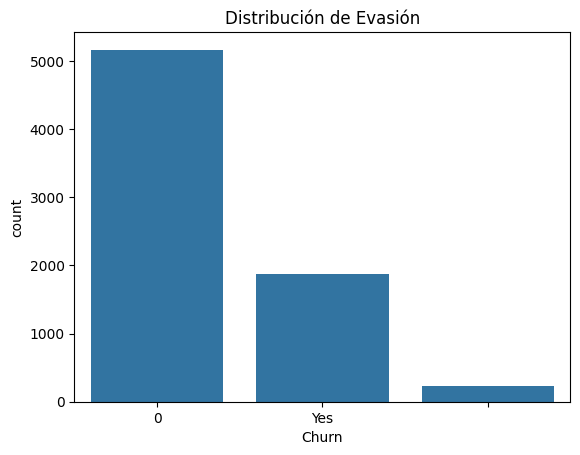

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Evasión")
plt.show()

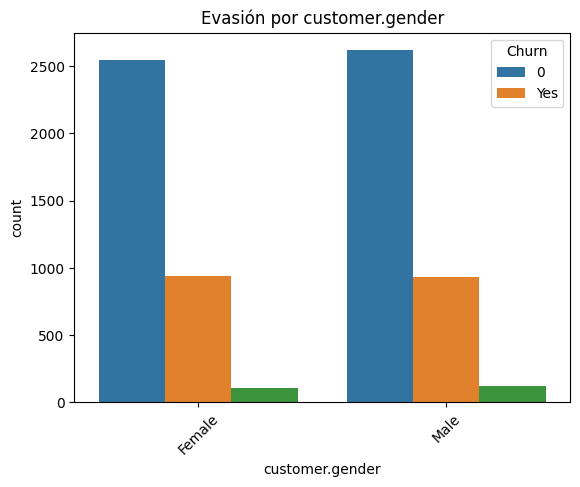

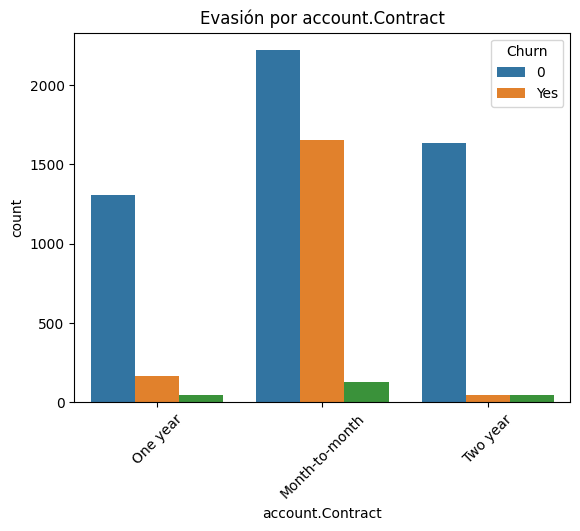

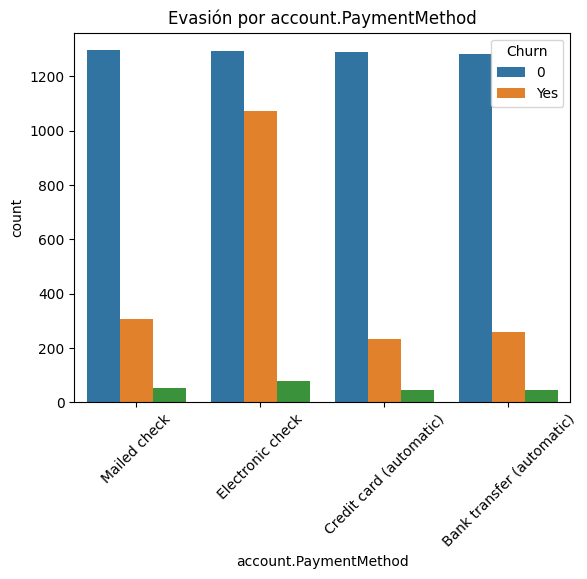

In [ ]:

categorical_cols = ['Genero', 'TipoContrato', 'MetodoPago']
for col in categorical_cols:
    sns.countplot(x=col, hue='Evasion', data=df)
    plt.title(f'Evasión por {col}')
    plt.xticks(rotation=45)
    plt.show()


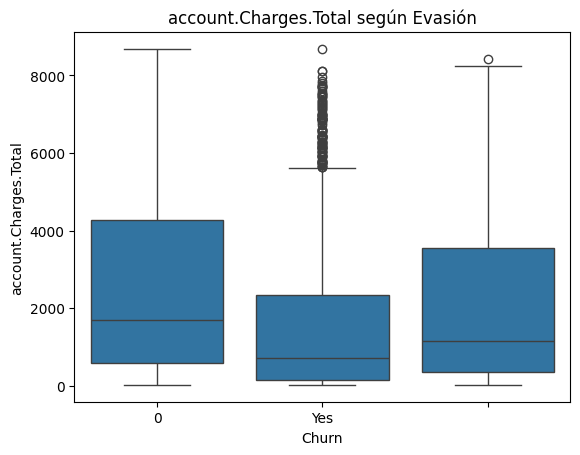

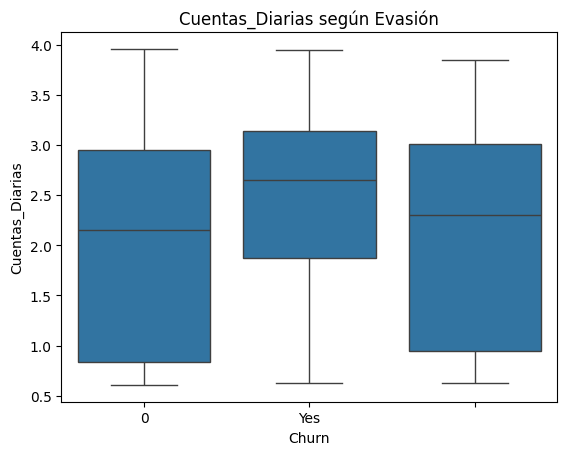

In [ ]:
numerical_cols = ['account.Charges.Total', 'Cuentas_Diarias']
for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} según Evasión')
    plt.show()

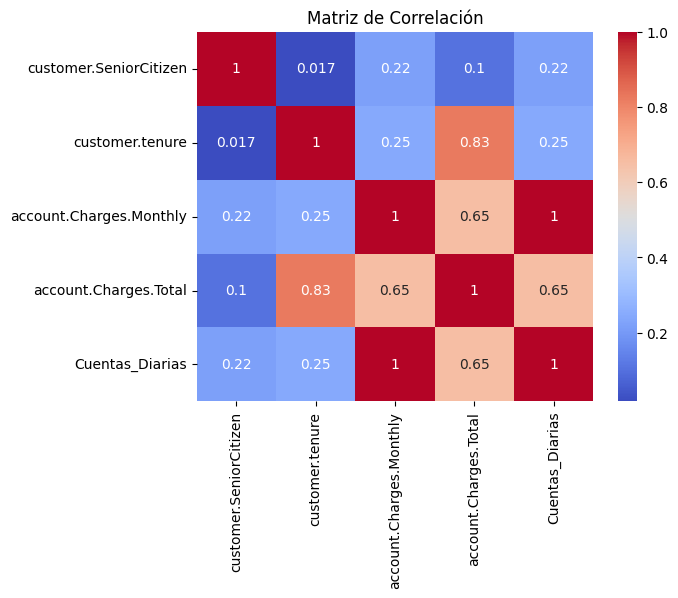

In [ ]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


# Conclusiones e Insights

- La variable `Evasion` presenta un porcentaje significativo de cancelación.
- Variables como `TipoContrato`, `MetodoPago` y `TotalGasto` están fuertemente asociadas al churn.
- Los contratos mensuales tienden a tener más evasión.
- Facturación mensual y gasto total alto también parecen estar correlacionados con mayor evasión.

# Recomendaciones

- Ofrecer beneficios en contratos anuales.
- Incentivar el uso de métodos de pago automáticos.
- Monitorear clientes con altos gastos o contratos cortos para anticipar cancelaciones.
